In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency
import os
%matplotlib inline

In [2]:
# Setting working directory
os.chdir("C:/Users/MaheshHiremath/Desktop/Project")

# Loading dataframe
df = pd.read_excel("Absenteeism_at_work_Project.xls")

Exploratory Data Analysis

In [3]:
# First 10 rows of data
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [4]:
# Data Types of all the variables
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [5]:
# Number of Unique values present in each variable
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [6]:
df.shape

(740, 21)

In [7]:
# From the EDA and problem statement file categorising into two category " Continuos" and "Categorical" variables
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

 Missing Value Analysis

In [8]:
#Creating dataframe with missing values present in each variable
missing_val = pd.DataFrame(df.isnull().sum()).reset_index()

#Renaming variables of missing_val dataframe
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating percentage missing value
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

# Sorting missing_val in Descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Saving output result into csv file
missing_val.to_csv("Missing_perc.csv", index = False)

 Imputation methods

In [9]:
# Droping observation in which "Absenteeism time in hours" has missing value
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
#print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())
#print(df)

0


Data cleaning

In [10]:
df.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              6
Distance from Residence to Work     3
Service time                        3
Age                                 2
Work load Average/day               8
Hit target                          6
Disciplinary failure                5
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    29
Absenteeism time in hours           0
dtype: int64

In [11]:
# Imputing with mean
print(df.columns)
print(df.info())
print(df.isnull().sum())
df = df.fillna(df.mean())
print(df.isnull().sum())

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 739
Data columns (total 21 columns):
ID                                 718 non-null int64
Reason for absence                 715 non-null float64
Month of absence                   717 non-null float64
Day of the week                    718 non-null int64
Seasons                            718 non-null int64
Transportation expense             712 non-null float64
Distance from Residence to Work    715 non-null float64
Service time                       715 non-null float64
Age                             

In [12]:
df.shape

(718, 21)

In [13]:
# Checking if all the missing value imputed
df.isnull().sum().sum()

0

Outlier Analysis

Text(0, 0.5, 'Values')

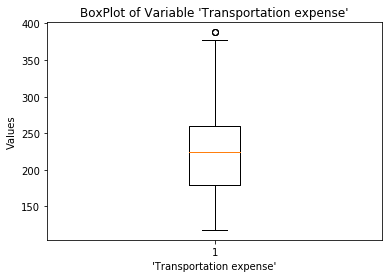

In [14]:
# Ploting BoxPlot of continuous variables
plt.boxplot(df['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')
#plt.savefig('Transportation_expense.png')

Text(0, 0.5, 'Values')

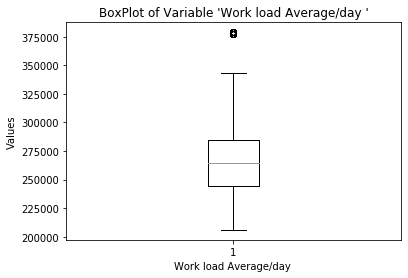

In [15]:
plt.boxplot(df['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')
#plt.savefig('Work load Average.png')

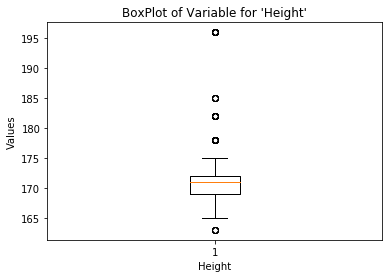

In [18]:
plt.boxplot(df['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')
plt.savefig('Height.png')

Text(0, 0.5, 'Values')

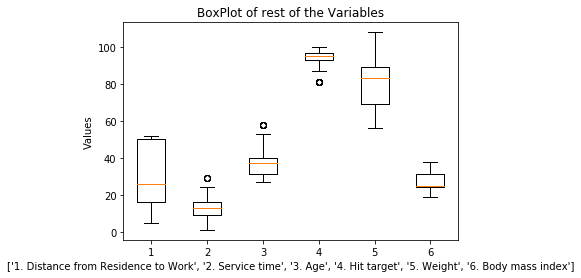

In [16]:
plt.boxplot([ df['Distance from Residence to Work'], df['Service time'], df['Age'], df['Hit target'], df['Weight'], df['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')
#plt.savefig('BoxPlot of rest of the Variables.png')

In [17]:
# From the above boxplot we can clearly see that in variables 'Distance from Residence to Work', 'Weight' and 'Body mass index'
# there is no outlier

In [18]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuous variables to detect and remove Outliers
for i in continuous_vars:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 70 and 30 percentile of variable "i"
    q70, q30 = np.percentile(df[i], [70,30])
    # Calculating Interquartile range
    iqr = q70 - q30
    
    # Calculating upper extream and lower extream
    minimum = q30 - (iqr*1.5)
    maximum = q70 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan

#Imputing missing values with mean
df = df.fillna(df.mean())

# Checking if there is any missing value
df.isnull().sum().sum()

0

In [19]:
df.shape

(718, 21)

Feature Selection

In [20]:
##Correlation analysis for continuous variables
#Correlation plot
df_corr = df.loc[:,continuous_vars]

[]

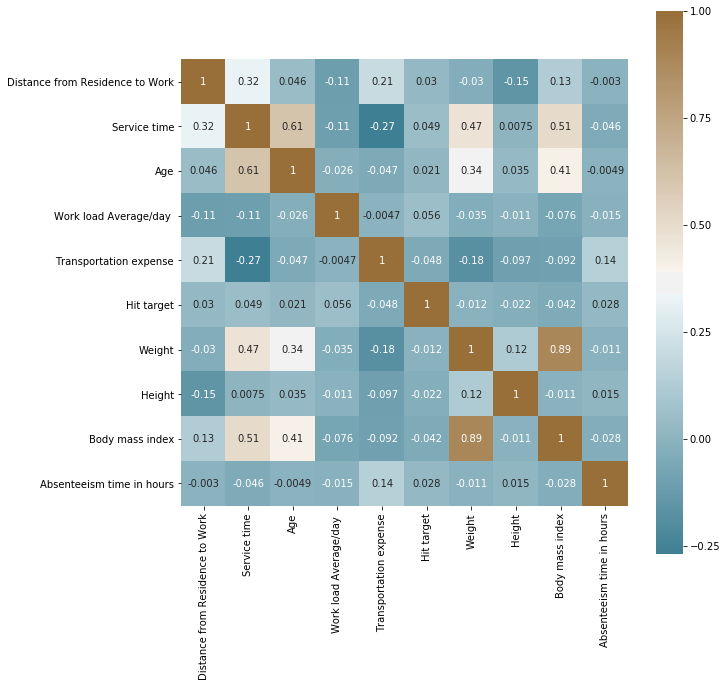

In [21]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()
#plt.savefig('heatmap.png')

In [22]:
# based on above correlations data, varaibles  'Transport expense', 'Hit target',
#'Work load Average/day' are highly correlated to target variable 

In [23]:
#loop for ANOVA test Since the target variable is continuous
for i in categorical_vars:
    f, p = stats.f_oneway(df[i], df["Absenteeism time in hours"])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable ID is 2.6888712254772103e-168
P value for variable Reason for absence is 5.260739244332726e-279
P value for variable Month of absence is 6.316518172964382e-27
P value for variable Day of the week is 0.00276365443242278
P value for variable Seasons is 2.557016509176232e-39
P value for variable Disciplinary failure is 1.281611334871804e-187
P value for variable Education is 9.271524716143012e-105
P value for variable Social drinker is 8.137184300735509e-152
P value for variable Social smoker is 1.0804268719627992e-185
P value for variable Pet is 2.162751145075096e-127
P value for variable Son is 2.9537200516011844e-116


In [24]:
# Droping the variables which has redundant information
to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [25]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

In [26]:
clean_data = df.copy()

Feature Scaling

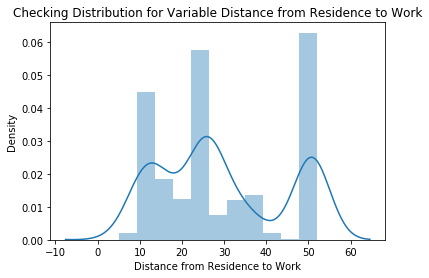

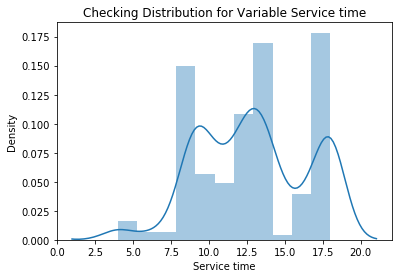

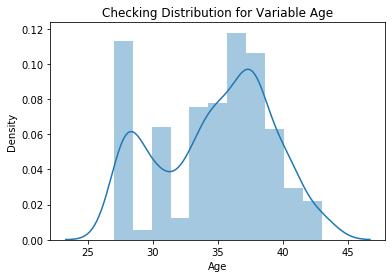

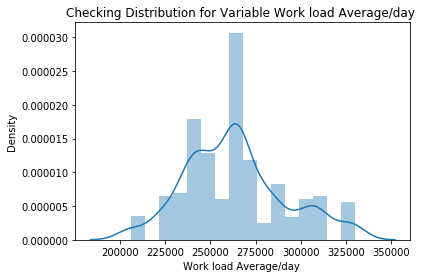

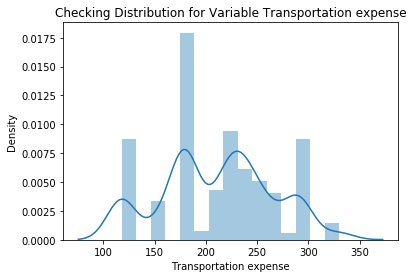

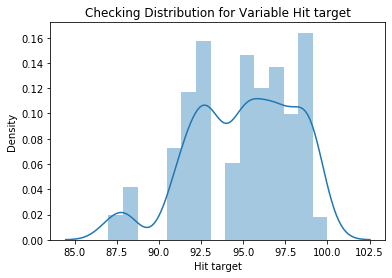

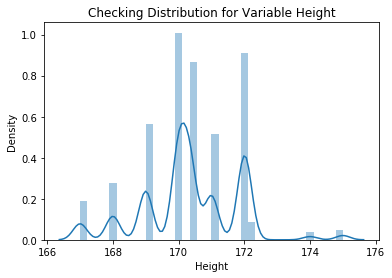

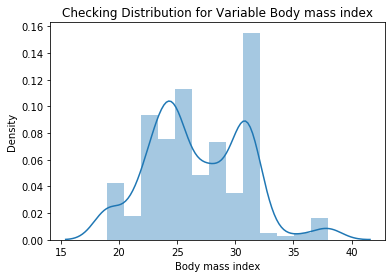

In [27]:
# Checking if there is any normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [28]:
# Since there is no normally distributed curve we will use Normalizationg for Feature Scalling
# #Normalization
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

Machine Learning Models

In [29]:
# Get dummy variables for categorical variables
df = pd.get_dummies(data = df, columns = categorical_vars)

# Copying dataframe
df1 = df.copy()

In [30]:
df.iloc[:,8].head()

0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

In [31]:
df.iloc[:, df.columns != 'Absenteeism time in hours'].head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,ID_1,ID_2,...,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_1.0098314606741574,Son_2.0,Son_3.0,Son_4.0
0,0.806604,0.659574,0.642857,0.375,0.270951,0.769231,0.625,0.578947,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 8], test_size = 0.30)

Decision Tree

In [33]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 2.974893368061946
Root Mean Squared Error For Test data = 3.559108216263394
R^2 Score(coefficient of determination) = -0.005427314332536293
The Acuracy for our Model is  -0.5427314332536293 %


Random Forest

In [34]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 1.0051402812482244
Root Mean Squared Error For Test data = 3.0402973503355697
R^2 Score(coefficient of determination) = 0.26633058407274224
The Acuracy for our Model is  26.633058407274223 %


Linear Regression

In [35]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 2.1645414165138144
Root Mean Squared Error For Test data = 1947665739000.1409
R^2 Score(coefficient of determination) = -3.0109056228197153e+23
The Acuracy for our Model is  -3.010905622819715e+25 %


Gradient Boosting

In [36]:
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 1.8693979876909947
Root Mean Squared Error For Test data = 3.015338514501074
R^2 Score(coefficient of determination) = 0.27832702362954154
The Acuracy for our Model is  27.832702362954155 %


Dimensionality Reduction using PCA

In [37]:
target = df['Absenteeism time in hours']

In [38]:
df.drop(['Absenteeism time in hours'], inplace = True, axis=1)
df.shape

(718, 123)

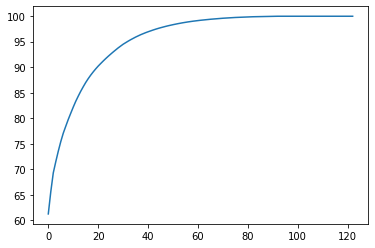

In [39]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = df1.values

# Data has 123 variables so no of components of PCA = 123
pca = PCA(n_components=123)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [40]:
# From the above plot selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.3)

Decision Tree

In [41]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 0.566288750951731
Root Mean Squared Error For Test data = 0.5466859937505755
R^2 Score(coefficient of determination) = 0.9720685702432182
The Acuracy for our Model is  97.20685702432182 %


Random Forest

In [42]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 0.018893563067567554
Root Mean Squared Error For Test data = 0.00941753793887583
R^2 Score(coefficient of determination) = 0.9999917111929648
The Acuracy for our Model is  99.99917111929648 %


Linear Regression

In [43]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 3.941081474097388e-15
Root Mean Squared Error For Test data = 0.011828934097889203
R^2 Score(coefficient of determination) = 0.9999869229887648
The Acuracy for our Model is  99.99869229887648 %


Gradient Boosting

In [44]:
# Importing library for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))
n = r2_score(y_test, pred_test)*100
print("The Acuracy for our Model is ",n,"%")

Root Mean Squared Error For Training data = 0.0003160042229862557
Root Mean Squared Error For Test data = 0.0002957927692937116
R^2 Score(coefficient of determination) = 0.9999999918230305
The Acuracy for our Model is  99.99999918230304 %
